# Задача 32

In [39]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sbn
import math
import collections

In [40]:
def sample_mean(x):
    if x.ndim == 1:
        x = np.reshape(x, (1, x.shape[0]))
    return np.array([np.sum(xi) / float(xi.shape[0]) for xi in x])

def sample_variance(x, mean):
    if x.ndim == 1:
        x = np.reshape(x, (1, x.shape[0]))
    return np.array([np.sum(np.square(xi-meani*np.ones(xi.shape[0]))) / float(xi.shape[0]) for xi, meani in zip(x, mean)])

def create_normal_samples(sample_count, sample_vol, mu=0, sigma=1):
    return rd.normal(loc=mu, scale=sigma**2, size=(sample_count, sample_vol))


# эмпирическая функция распределения

def EDF(sample, x):
    return np.sum(sample < x) / float(sample.shape[0])

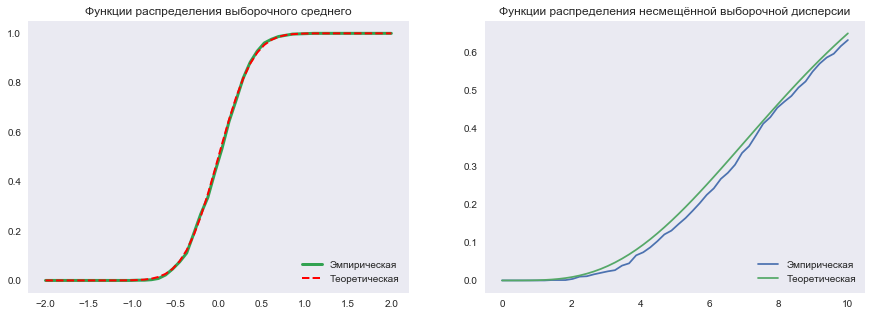

In [102]:
sample_count = 1000
sample_vol = 10
sigma = 1
mu = 0

X = create_normal_samples(sample_count, sample_vol, mu=mu, sigma=sigma)
x = np.linspace(-2.0, 2.0, 50)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1).plot(x, np.array([EDF(sample_mean(X), xi) for xi in x]), label=u'Эмпирическая', color='#32a251', linewidth=3)
plt.subplot(1, 2, 1).plot(x, stat.norm.cdf(x, loc=mu, scale=sigma/np.sqrt(sample_vol)), label=u'Теоретическая', color='r', linestyle='--', linewidth=2)
plt.grid()
plt.title(u'Функции распределения выборочного среднего')
plt.legend(loc=4)

x = np.linspace(0, 10, 50)
plt.subplot(1, 2, 2).plot(x, np.array([EDF(sample_vol * sample_variance(X, sample_mean(X)) / sigma**2, xi) for xi in x]), label=u'Эмпирическая')
plt.subplot(1, 2, 2).plot(x, stat.chi2.cdf(x, sample_vol-1), label=u'Теоретическая')
plt.title(u'Функции распределения несмещённой выборочной дисперсии')
plt.legend(loc=4)
plt.grid()
plt.show()

In [61]:
np.size(sample_mean(X)/2.0)

100

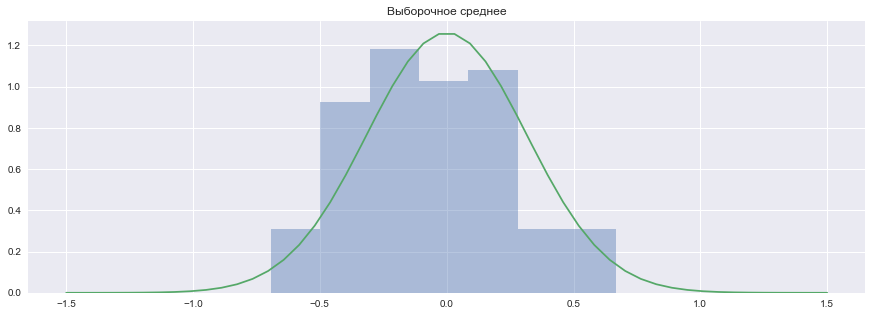

In [68]:
fig = plt.figure(figsize=(15, 5))
sbn.distplot(sample_mean(X), norm_hist=True, kde=False)
plt.title(u'Выборочное среднее')
x = np.linspace(-1.5, 1.5, 50)
plt.plot(x, stat.norm.pdf(x, loc=mu, scale=sigma/np.sqrt(sample_vol)))
plt.show()

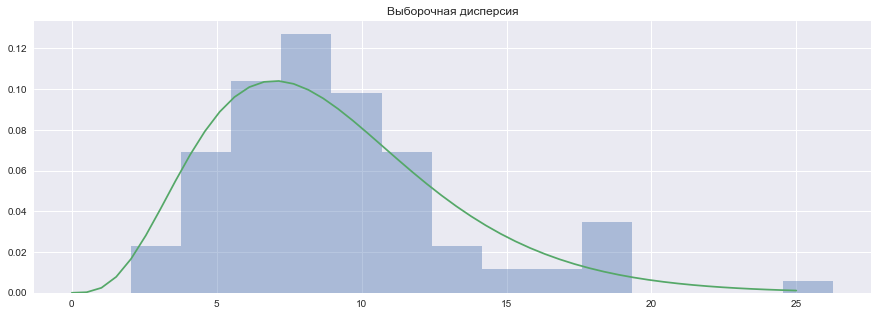

In [43]:
#sbn.distplot(sample_mean(X))
#plt.show()
fig = plt.figure(figsize=(15, 5))
sbn.distplot(sample_vol * sample_variance(X, sample_mean(X)) / sigma**2, kde=False, norm_hist=True)
plt.title(u'Выборочная дисперсия')
x = np.linspace(0, 25, 50)
plt.plot(x, stat.chi2.pdf(x, sample_vol-1), label=u'Теоретическая')

plt.show()

# Гистограмма. Эксперименты с количеством интервалов.

In [97]:
def hist_bins(n, m, bins, hist=True, kde=False):
    fig = plt.figure(figsize=(15, 18))
    for i, descr in enumerate(bins.keys()):
        plt.subplot(n, m, i+1)
        sbn.distplot(sample_mean(X), 
                     bins=bins[descr], 
                     hist=hist, 
                     kde=kde, 
                     kde_kws={"kernel": "gau"}, norm_hist=True)
        x = np.linspace(-1.5, 1.5, 50)
        plt.plot(x, stat.norm.pdf(x, loc=mu, scale=sigma/np.sqrt(sample_vol)))
        plt.title(descr)
    plt.show()
    

In [100]:
bins = collections.OrderedDict()
bins[u'bins=3']=3
bins[u'bins=100']=100
bins[u'bins = n**0.5']=int(sample_count**0.5)
bins[u'bins = log(n) + 1']=int(math.ceil(math.log(sample_count, 2))+1)
bins[u'Rice Rule']=int(math.ceil((2*sample_count)**(1.0/3.0)))
bins[u'Freedman–Diaconis choice']=None

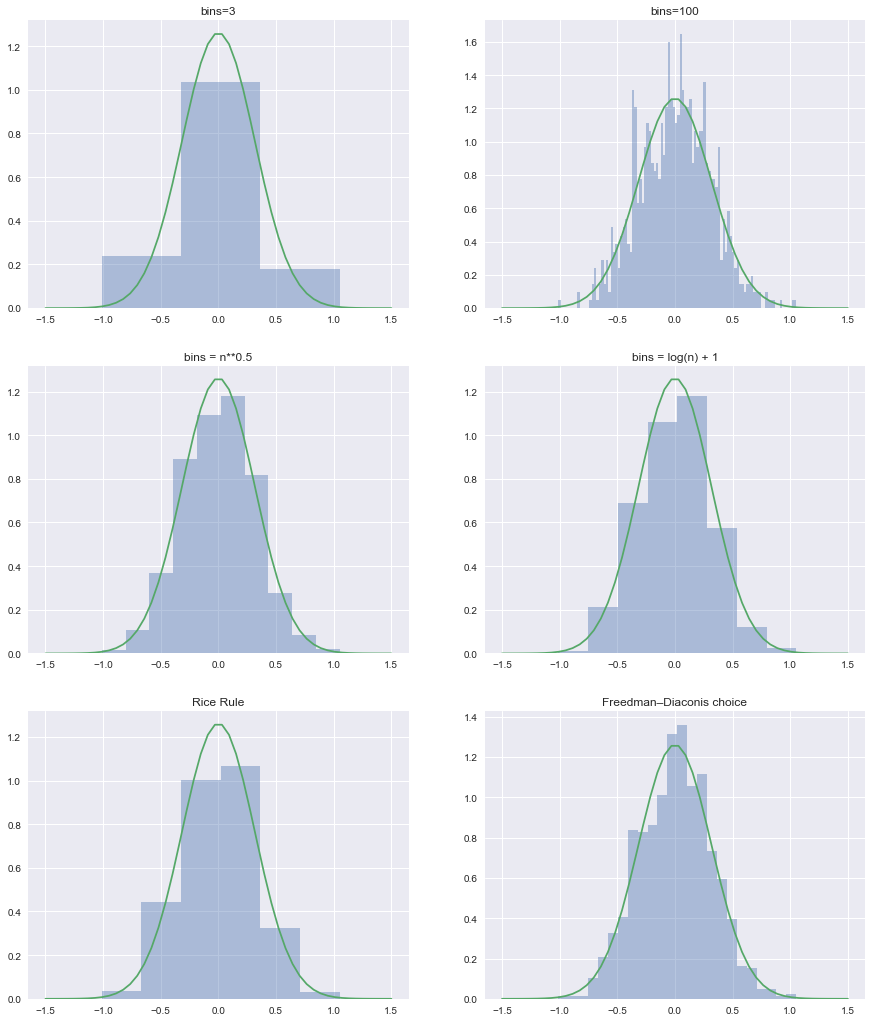

In [103]:
hist_bins(3, 2, bins, hist=True, kde=False)